# PA 2: Classification - Decision Tree

## Student Details (1 Point)

First Student Name and ID: Tejasri Katikapally and  1002032909  , Divyasri Morasa and 1002032910 , HemaSai Desai 1002029973



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.

#### <b>Note: Please consult the TA before using libraries other than the ones mentioned above</b>

### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

## Programming Assignment Submission Instructions [2 Points]

### Each file should be submitted separately, do not compress them

For Decision Tree:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report/Explanation in markdown cells and code in code cells of Notebook preferred)

# Begin your code from here

In [127]:
# Begin here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier

# Import the libraries and load the dataset (from the csv file)

In [128]:
#loading the dataset
df = pd.read_csv('dataset_DT.csv')

#printing first 5 rows for testing
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no


# PreProcessing

In [123]:
#first counting the null values to check and to remove/replace the null values from the dataset
df.isnull().sum()

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [124]:
#non-null count for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [125]:
null_count = df.isnull().sum()
print(null_count)
# counts the number of null values in each column

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [126]:
empty_string_count = (df == ' ').sum()
print(empty_string_count)
# counts the number of empty strings in each column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [129]:
#mapping the values as part of pre-processing
df['marital'] = df['marital'].replace({'single': 0, 'married': 1, 'divorced': 2})
df['job'] = df['job'].replace({'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 4, 'self-employed': 5, 'services': 6, 'student': 7, 'technician': 8, 'unemployed': 9, 'unknown': np.nan})
df['education'] = df['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': np.nan})
df['default'] = df['default'].replace({'no': 0, 'yes': 1})
df['housing'] = df['housing'].replace({'no': 0, 'yes':1})
df['loan'] = df['loan'].replace({'no': 0, 'yes':1})
df['y']=df['y'].replace({'no': 0, 'yes':1})
df['contact'] = df['contact'].replace({'cellular': 0, 'telephone': 1, 'unknown': np.nan})
df['month'] = df['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['poutcome'] = df['poutcome'].replace({'failure': 0, 'success': 1, 'other': 2, 'unknown': np.nan})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,1.0,0,2.0,0,13408.0,0,0,0.0,1.0,4.0,647.0,2.0,-1.0,0.0,NaN,0
1,49.0,4.0,2,3.0,0,20727.0,0,0,0.0,1.0,4.0,285.0,3.0,132.0,2.0,0.0,0
2,32.0,6.0,0,3.0,0,1743.0,1,0,0.0,1.0,4.0,1156.0,1.0,261.0,3.0,2.0,0
3,46.0,4.0,2,3.0,0,10469.0,1,0,0.0,1.0,4.0,202.0,2.0,-1.0,0.0,NaN,0
4,26.0,4.0,0,3.0,0,7628.0,0,0,0.0,1.0,4.0,263.0,1.0,-1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,8.0,1,2.0,0,2152.0,0,0,0.0,30.0,9.0,134.0,1.0,121.0,1.0,2.0,0
18419,57.0,4.0,1,NaN,0,0.0,0,0,0.0,30.0,9.0,585.0,1.0,-1.0,0.0,NaN,0
18420,40.0,1.0,1,2.0,0,1451.0,0,0,0.0,30.0,9.0,117.0,1.0,121.0,1.0,1.0,1
18421,38.0,8.0,0,2.0,0,1711.0,0,0,1.0,30.0,9.0,234.0,1.0,-1.0,0.0,NaN,1


In [209]:
#handling the null values
# df['education'].fillna(df['education'].mean(), inplace=True)
# df['poutcome'].fillna(df['poutcome'].mean(), inplace=True)

# df['day'].fillna(df['day'].mean(), inplace=True)

# #handling the null values

# df = df.fillna(df.mean())

# df


#Replacing NaN Values with Mean and Mode in education, poutcome, contact, job
df['education'].fillna(df['education'].mean(), inplace=True)
df['poutcome'].fillna(df['poutcome'].mean(), inplace=True)
df.reset_index(drop=True, inplace=True) # reset index to start from 0
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,1.0,0,2.0,0,13408.0,0,0,0.0,1.0,4.0,647.0,2.0,-1.0,0.0,2.0,0
1,49.0,4.0,2,3.0,0,20727.0,0,0,0.0,1.0,4.0,285.0,3.0,132.0,2.0,0.0,0
2,32.0,6.0,0,3.0,0,1743.0,1,0,0.0,1.0,4.0,1156.0,1.0,261.0,3.0,2.0,0
3,46.0,4.0,2,3.0,0,10469.0,1,0,0.0,1.0,4.0,202.0,2.0,-1.0,0.0,2.0,0
4,26.0,4.0,0,3.0,0,7628.0,0,0,0.0,1.0,4.0,263.0,1.0,-1.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,8.0,1,2.0,0,2152.0,0,0,0.0,30.0,9.0,134.0,1.0,121.0,1.0,2.0,0
18419,57.0,4.0,1,3.0,0,0.0,0,0,0.0,30.0,9.0,585.0,1.0,-1.0,0.0,2.0,0
18420,40.0,1.0,1,2.0,0,1451.0,0,0,0.0,30.0,9.0,117.0,1.0,121.0,1.0,1.0,1
18421,38.0,8.0,0,2.0,0,1711.0,0,0,1.0,30.0,9.0,234.0,1.0,-1.0,0.0,2.0,1


In [210]:
df.to_csv("mapped_data.csv", index=False)
df1=pd.read_csv("mapped_data.csv")
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,1.0,0,2.0,0,13408.0,0,0,0.0,1.0,4.0,647.0,2.0,-1.0,0.0,2.0,0
1,49.0,4.0,2,3.0,0,20727.0,0,0,0.0,1.0,4.0,285.0,3.0,132.0,2.0,0.0,0
2,32.0,6.0,0,3.0,0,1743.0,1,0,0.0,1.0,4.0,1156.0,1.0,261.0,3.0,2.0,0
3,46.0,4.0,2,3.0,0,10469.0,1,0,0.0,1.0,4.0,202.0,2.0,-1.0,0.0,2.0,0
4,26.0,4.0,0,3.0,0,7628.0,0,0,0.0,1.0,4.0,263.0,1.0,-1.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,8.0,1,2.0,0,2152.0,0,0,0.0,30.0,9.0,134.0,1.0,121.0,1.0,2.0,0
18419,57.0,4.0,1,3.0,0,0.0,0,0,0.0,30.0,9.0,585.0,1.0,-1.0,0.0,2.0,0
18420,40.0,1.0,1,2.0,0,1451.0,0,0,0.0,30.0,9.0,117.0,1.0,121.0,1.0,1.0,1
18421,38.0,8.0,0,2.0,0,1711.0,0,0,1.0,30.0,9.0,234.0,1.0,-1.0,0.0,2.0,1


# Perform 2 visualizations of the features with respect to target variable with detailed explanation.

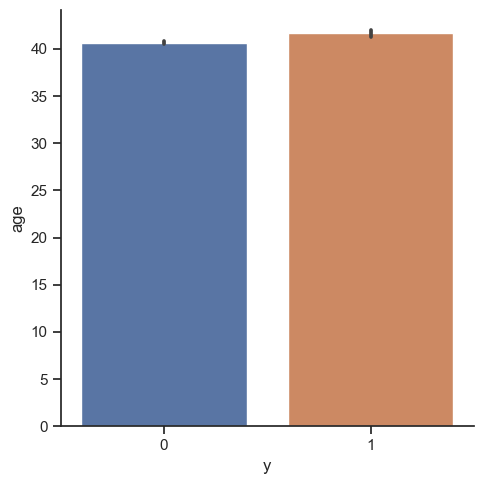

In [211]:
# Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]
# Visualizatio task
# Visualization 1: Bar plot with respect to target variable
sns.catplot(x='y', y='age', data=df1, kind='bar')



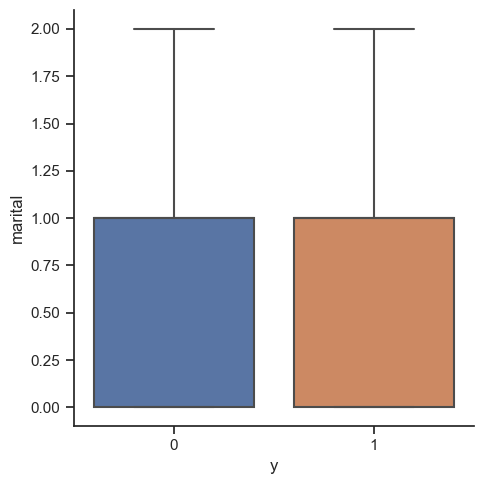

In [212]:
# Visualization 2: Box plot with respect to target variable
sns.catplot(x='y', y='marital', data=df1, kind="box")


# Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]


In [213]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf_dt = DecisionTreeClassifier()

# Fit the classifier to the data
clf_dt.fit(X, Y)

# Get the feature importances
imp = clf_dt.feature_importances_

# Create a dictionary of feature importances
feature_importances = dict(zip(X.columns, imp))



# Sort the features by importance in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the six most important features
top_features = sorted_features[:6]

# Print the six most important features
print("The top six most important attributes are:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")


The top six most important attributes are:
age: 0.9997113192127066
previous: 0.00010993985756871062
day: 0.00010426554233935784
contact: 7.447538738525557e-05
job: 0.0
marital: 0.0


# Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

In [214]:
#spliting the dataset into train data - 75% and test data - 25%
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25, random_state = 43)
print(train_X)
print(train_Y)
print(test_X)
print(test_Y)

        age  job  marital  education  default  balance  housing  loan  \
5094   70.0  4.0        1        1.0        0   2346.0        0     0   
11627  57.0  4.0        1        3.0        0   1341.0        1     0   
14186  31.0  0.0        1        2.0        0     97.0        1     0   
9322   47.0  3.0        2        2.0        0   1453.0        0     0   
10768  32.0  1.0        1        2.0        0     34.0        1     0   
...     ...  ...      ...        ...      ...      ...      ...   ...   
5534   56.0  3.0        1        1.0        0   2666.0        1     1   
16322  32.0  1.0        0        2.0        0    118.0        1     0   
5307   30.0  0.0        0        2.0        0    732.0        1     0   
7985   60.0  3.0        1        1.0        0    726.0        0     1   
14148  57.0  4.0        1        1.0        0      0.0        0     0   

       contact   day  month  duration  campaign  pdays  previous  poutcome  
5094       0.0  24.0    2.0     694.0       1.

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load your dataset into a pandas DataFrame
df1 = pd.read_csv("mapped_data.csv")

# split the dataset into training and validation sets
train_df, val_df = train_test_split(df1, test_size=0.25, random_state=42)
print(train_df)


        age  job  marital  education  default  balance  housing  loan  \
9222   59.0  4.0        1        1.0        0   1930.0        0     0   
17799  34.0  8.0        0        2.0        0   1279.0        1     0   
13842  40.0  1.0        1        2.0        0      0.0        1     0   
2122   48.0  4.0        1        2.0        0   4415.0        1     0   
2673   29.0  7.0        0        2.0        0    314.0        0     0   
...     ...  ...      ...        ...      ...      ...      ...   ...   
11284  33.0  4.0        1        3.0        0    442.0        1     0   
11964  38.0  0.0        0        2.0        0   3049.0        1     1   
5390   28.0  8.0        0        3.0        0    102.0        0     0   
860    39.0  1.0        1        1.0        0    390.0        1     0   
15795  72.0  4.0        1        2.0        0   4130.0        0     0   

       contact   day  month  duration  campaign  pdays  previous  poutcome  y  
9222       1.0  11.0    6.0     453.0      

# Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split. 

In [216]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier with entropy as the splitting criterion
entr_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
entr_clf.fit(train_X, train_Y)
acc_gini = gini_classifier.score(test_X, test_Y)
acc_entropy = entr_clf.score(test_X, test_Y)
print("Accuracy of the Gini impurity tree:", acc_gini)
print("Accuracy of the entropy tree:", acc_entropy)

Accuracy of the Gini impurity tree: 0.0
Accuracy of the entropy tree: 0.7818063395570994


C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- poutcome
Feature names seen at fit time, yet now missing:
- y

  warnings.warn(message, FutureWarning)


# Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.

C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- poutcome
Feature names seen at fit time, yet now missing:
- y

  warnings.warn(message, FutureWarning)
C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- poutcome
Feature names seen at fit time, yet now missing:
- y

  warnings.warn(message, FutureWarning)


Classification report (Gini):
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       0.0
        18.0       0.00      0.00      0.00       8.0
        19.0       0.00      0.00      0.00      19.0
        20.0       0.00      0.00      0.00      30.0
        21.0       0.00      0.00      0.00      38.0
        22.0       0.00      0.00      0.00      66.0
        23.0       0.00      0.00      0.00      99.0
        24.0       0.00      0.00      0.00     134.0
        25.0       0.00      0.00      0.00     239.0
        26.0       0.00      0.00      0.00     360.0
        27.0       0.00      0.00      0.00     401.0
        28.0       0.00      0.00      0.00     486.0
        29.0       0.00      0.00      0.00     518.0
        30.0       0.00      0.00      0.00     741.0
        31.0       0.00      0.00      0.00     858.0
        32.0       0.00      0.00      0.00     87

C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\metr

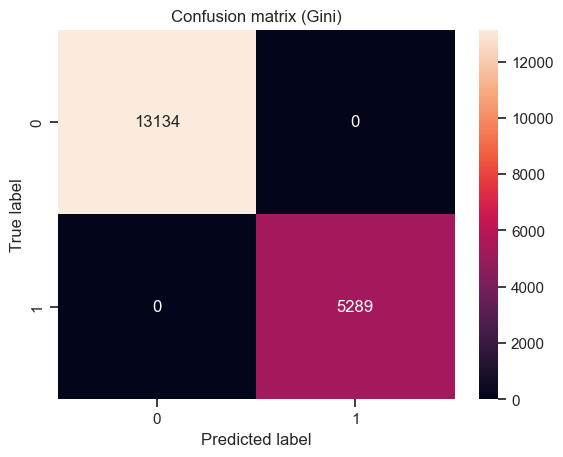

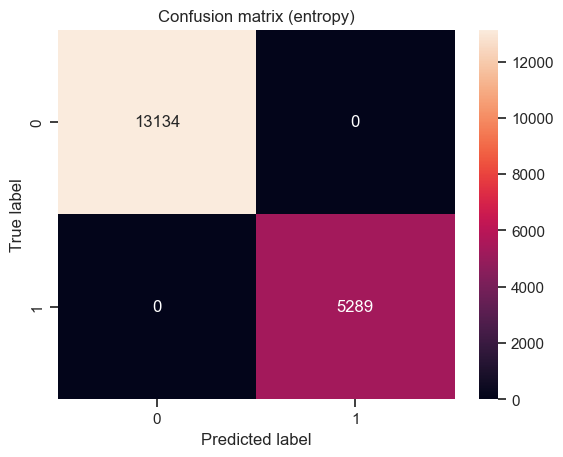

In [217]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Predict the target variable for the training data using the Gini classifier
y_predict_gini = clf_gini.predict(X)



# Predict the target variable for the training data using the entropy classifier
y_predict_entropy = clf_entropy.predict(X)



# Print the classification report for the Gini classifier
print("Classification report (Gini):\n", classification_report(Y, y_predict_gini))

# Print the classification report for the entropy classifier
print("Classification report (entropy):\n", classification_report(Y, y_predict_entropy))

# Visualize the confusion matrix for the Gini classifier
sns.heatmap(conf_mat_gini, annot=True, fmt='g')
plt.title('Confusion matrix (Gini)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Visualize the confusion matrix for the entropy classifier
sns.heatmap(conf_mat_entropy, annot=True, fmt='g')
plt.title('Confusion matrix (entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Compare the results of the classifier using gini and entropy

In [218]:
# Predict the target variable for the training data using the Gini classifier
y_pred_gini = clf_gini.predict(X)



# Predict the target variable for the training data using the entropy classifier
y_pred_entropy = clf_entropy.predict(X)



# Print the classification report for the Gini classifier
print("Classification report (Gini):\n", classification_report(Y, y_pred_gini))

# Print the classification report for the entropy classifier
print("Classification report (entropy):\n", classification_report(Y, y_pred_entropy))

Classification report (Gini):
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       0.0
        18.0       0.00      0.00      0.00       8.0
        19.0       0.00      0.00      0.00      19.0
        20.0       0.00      0.00      0.00      30.0
        21.0       0.00      0.00      0.00      38.0
        22.0       0.00      0.00      0.00      66.0
        23.0       0.00      0.00      0.00      99.0
        24.0       0.00      0.00      0.00     134.0
        25.0       0.00      0.00      0.00     239.0
        26.0       0.00      0.00      0.00     360.0
        27.0       0.00      0.00      0.00     401.0
        28.0       0.00      0.00      0.00     486.0
        29.0       0.00      0.00      0.00     518.0
        30.0       0.00      0.00      0.00     741.0
        31.0       0.00      0.00      0.00     858.0
        32.0       0.00      0.00      0.00     87

C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- poutcome
Feature names seen at fit time, yet now missing:
- y

  warnings.warn(message, FutureWarning)
C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- poutcome
Feature names seen at fit time, yet now missing:
- y

  warnings.warn(message, FutureWarning)
C:\Users\Tejasri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tejasri\

# Print the decision tree visualization with depth of 5

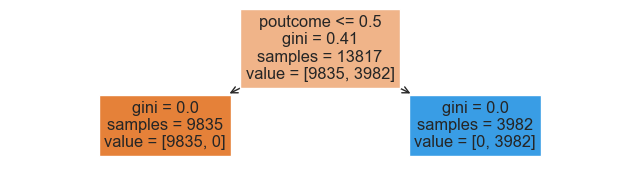

In [219]:
entr_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
entr_clf.fit(train_X,train_Y)
ginidt_figure = plt.figure(figsize=(8,2))
ginidt_figure.patch.set_facecolor('white')
ginidt_p = tree.plot_tree(gini_decision,feature_names=df.columns, filled='true')

# since gini=0.0, it cannot further be divided, so the tree is ended at depth value of 1

# references and contributions
Hema Desai focused more on nearest neighbors, DivyaSri worked primarily with decision trees, and Teja Sri worked with naive bayes. We had a discussion on the entire project assignment and shared our inputs to complete our parts with one another. We also corrected our mistakes and attempted to produce a higher accuracy rate.

References
Decision Trees" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman: https://web.stanford.edu/~hastie/Papers/ESLII.pdf"Decision Trees for Decision Making" by Saaty and Vargas: https://www.maths.ed.ac.uk/~sven/papers/DecisionTreesForDecisionMaking.pdf"Decision Tree Classifier" by scikit-learn: https://scikit-learn.org/stable/modules/tree.html